# Pymaceuticals Inc.
---

### Analysis

#### The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

In summary statistics tabel, Capomulin and Remicane have very close statistics values. Also, they are both at the lowest tumor volume for each statistics. Also number of mice tested for these two drugs were more than the others. 

The distributaion of male and female mice are almost equal.

In the next analysis, we compared Capomulin, Ramicane, Infubinol and Ceftamin. we determined if there is any outliers. and just showed on outlier for Infubinot and the rest of the data was really good without any outliers.

In general, Capomulin and Remicane have the lowest final tumor volume. 

we picked one mouse and check the relation between tumor volume and weight with Capomulin drug and it showed when tumor volume is growing, we an increasement in weight. It seems there is strong relation between these two variables. After calculating correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen was 0.84, displaying a strong and significant positive correlation.






In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(study_results ,mouse_metadata , on="Mouse ID" , how="outer")
# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
merged_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_data.loc[merged_data.duplicated(subset= ["Mouse ID" , "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate=merged_data.loc[merged_data["Mouse ID"] == "g989", :]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data=merged_data.drop(merged_data[merged_data["Mouse ID"] == "g989"].index, inplace = False)
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary=pd.DataFrame({"Mean Tumor Volume":mean,
                      "Median Tumor Volume": median,
                      "Tumor Volume Variance": variance,
                      "Tumor Volume Std. Dev.": standard_deviation,
                      "Tumor Volume Std. Err.":SEM})
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [137]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
Summary_statistic_table=cleaned_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})                                                                 
Summary_statistic_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

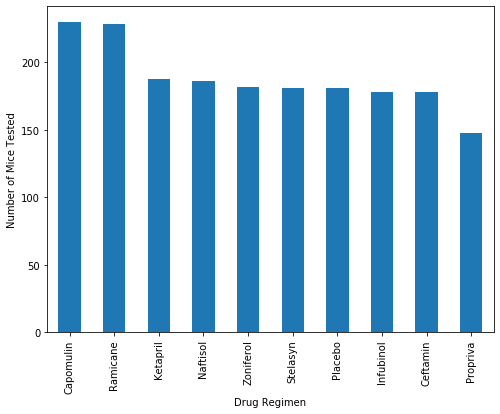

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Bar_plot_data=cleaned_data.groupby("Drug Regimen")["Timepoint"].count()
bar_plot_data=Bar_plot_data.sort_values(ascending=False)
bar_chart=bar_plot_data.plot(kind="bar" , figsize=(8,6))
bar_chart.set_ylabel("Number of Mice Tested")
plt.show()
plt.tight_layout()


array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype=object)

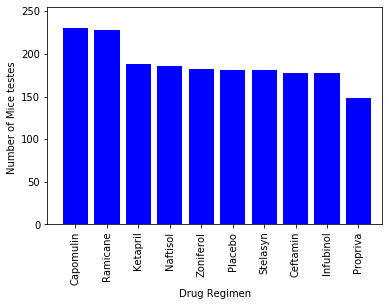

In [151]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
y_axis = cleaned_data["Drug Regimen"].value_counts()                  
x_axis = np.arange(len(y_axis))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis , color="b")
plt.xticks(tick_locations, y_axis.index.values , rotation="vertical")
# Set the limits of the x axis
plt.xlim(-0.9, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+25)

# Give our chart some labels and a tile
                
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice testes ")
                   
plt.show()



Male      958
Female    922
Name: Sex, dtype: int64


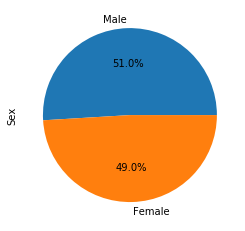

In [212]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_plot_data=cleaned_data["Sex"].value_counts()

pie_plot=pie_plot_data.plot(kind="pie", autopct="%1.1f%%")


Text(0, 0.5, 'Sex')

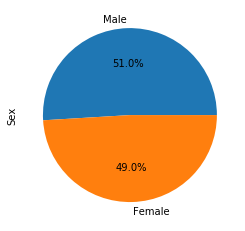

In [409]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes=cleaned_data["Sex"].value_counts()
labels=sizes.index.values
pie_Chart =plt.pie(sizes, labels=labels , autopct="%1.1f%%")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [369]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Greatest_Timepoint= cleaned_data.groupby("Mouse ID")["Timepoint"].max()
Greatest_Timepoint.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume=pd.merge(Greatest_Timepoint, cleaned_data , on=(["Mouse ID", "Timepoint"]))
tumor_volume=pd.DataFrame(tumor_volume)
tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [419]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

for drugs in treatments:
    drug_regimen = tumor_volume.loc[tumor_volume["Drug Regimen"] == drugs]
    tumorVol = drug_regimen["Tumor Volume (mm3)"]
    tumor_vol.append(tumorVol)
    
    quartiles=drug_regimen["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier=( tumorVol.loc[(drug_regimen["Tumor Volume (mm3)"] > upper_bound)| (drug_regimen["Tumor Volume (mm3)"]\
                        < lower_bound)]).count() 
    
    print(f"IQR for {drugs}:{iqr}")
    print(f"The lower quartile of {drugs} is: {lowerq}")
    print(f"The upper quartile of {drugs} is: {upperq}")
    print(f"The interquartile range of {drugs} is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"Number of outliers for {drugs} is {outlier}.")
    print(f"---------------------------------------")



IQR for Capomulin:7.781863460000004
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Number of outliers for Capomulin is 0.
---------------------------------------
IQR for Ramicane:9.098536719999998
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Number of outliers for Ramicane is 0.
---------------------------------------
IQR for Infubinol:11.477135160000003
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 cou

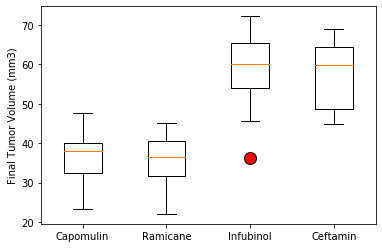

In [328]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1,ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')

plt.boxplot( tumor_vol, flierprops=flierprops)
plt.xticks([1,2,3,4],treatments)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

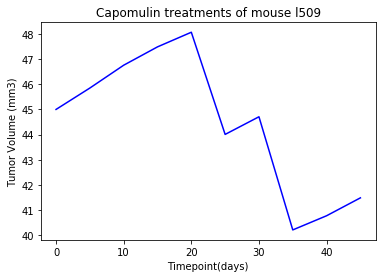

In [359]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_l509=cleaned_data.loc[cleaned_data["Mouse ID"] == "l509"]
capomulin__mouse_l509=mouse_l509.loc[mouse_l509["Drug Regimen"]== "Capomulin"]
 
plt.plot(capomulin__mouse_l509["Timepoint"] , capomulin__mouse_l509 ["Tumor Volume (mm3)"] , color="blue")

plt.title("Capomulin treatments of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")



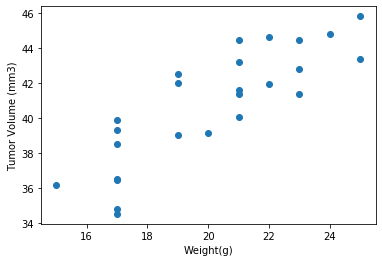

In [420]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df=cleaned_data.loc[cleaned_data["Drug Regimen"]== "Capomulin"]
capomulin_mean=capomulin_df.groupby("Mouse ID").mean()
plt.scatter(capomulin_mean["Weight (g)"] ,capomulin_mean["Tumor Volume (mm3)"] )
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


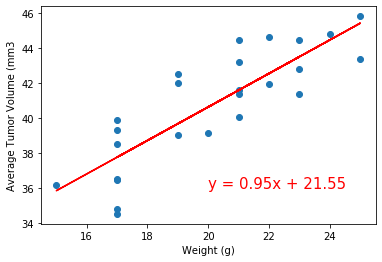

In [397]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight=capomulin_mean["Weight (g)"]
Avg_tumor_vol=capomulin_mean["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) =st.linregress(mouse_weight, Avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, Avg_tumor_vol)
plt.plot(mouse_weight, regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3')
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
#Correlation calculations
print(f"The correlation between mouse weight and the average tumor volume is\
 {round(st.pearsonr(mouse_weight,Avg_tumor_vol)[0],2)}.")
plt.show()